#Exploratory Data Analysis on cat 18 - cat 35
###Author: Samikha Srinivasan

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
filepath = "/content/drive/MyDrive/claims_data (1).csv"
df = pd.read_csv(filepath)

In [30]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [31]:
print("Shape:", df.shape)
print("-----------------------")
print("Data types:\n", df.dtypes.value_counts())
print("-----------------------")
print("Missing values:", df.isnull().sum().sort_values(ascending=False).sum())

Shape: (188318, 132)
-----------------------
Data types:
 object     116
float64     15
int64        1
Name: count, dtype: int64
-----------------------
Missing values: 0


In [32]:
# Separate columns by cat and con
id_col = "id"
target_col = "loss"
categorical_cols = [c for c in df.columns if c.startswith("cat")]
continuous_cols = [c for c in df.columns if c.startswith("cont")]

Target Summary:
 count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64


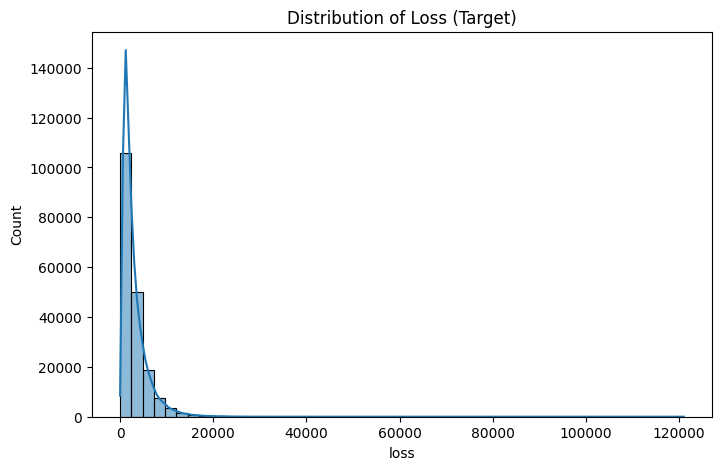

In [33]:
print("Target Summary:\n", df[target_col].describe())

plt.figure(figsize=(8,5))
sns.histplot(df[target_col], bins=50, kde=True)
plt.title("Distribution of Loss (Target)")
plt.show()

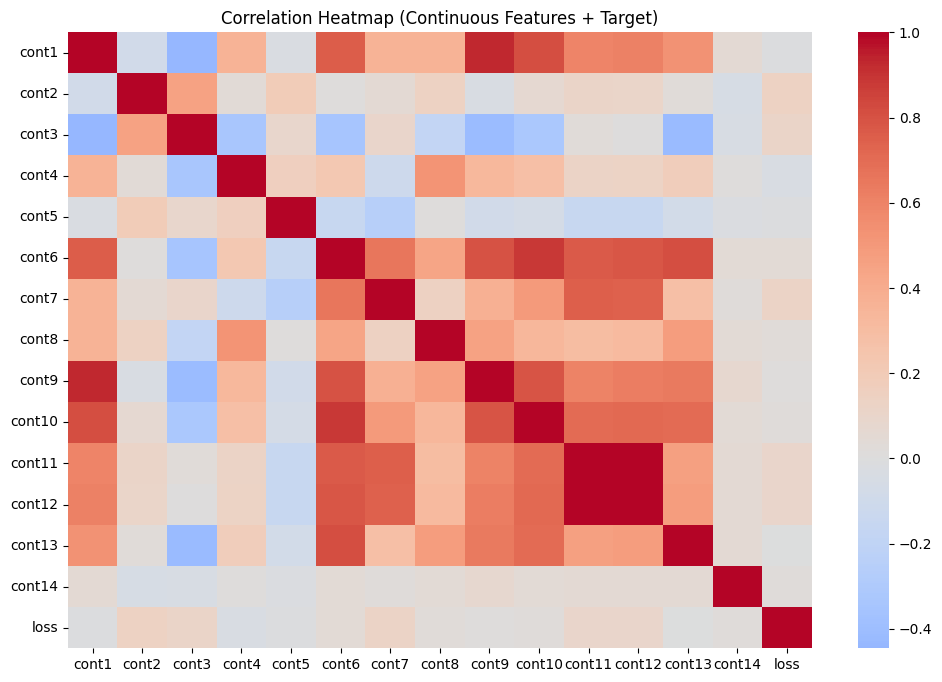

In [34]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr = df[continuous_cols + [target_col]].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Continuous Features + Target)")
plt.show()

In [35]:
# Compute correlation matrix
corr_matrix = df[continuous_cols + [target_col]].corr()

# Set a threshold for "high correlation"
threshold = 0.6

# Extract pairs with high correlation (absolute value)
high_corr = (
    corr_matrix.unstack()
    .reset_index()
    .rename(columns={"level_0":"Feature1", "level_1":"Feature2", 0:"Correlation"})
)

# Remove duplicates and self-correlations
high_corr = high_corr[
    (high_corr["Feature1"] < high_corr["Feature2"]) &
    (abs(high_corr["Correlation"]) >= threshold)
].sort_values(by="Correlation", ascending=False)

high_corr


,Feature1,Feature2,Correlation
161,cont11,cont12,0.994384
8,cont1,cont9,0.929912
140,cont10,cont6,0.883351
185,cont13,cont6,0.815091
9,cont1,cont10,0.808551
83,cont6,cont9,0.797544
143,cont10,cont9,0.785697
170,cont12,cont6,0.785144
155,cont11,cont6,0.773745
5,cont1,cont6,0.758315


In [36]:
features = [f'cat{i}' for i in range(18, 36)]
features.append('loss')
features.append('id')

df_shortened = df[features]

In [37]:
for col in features:
    print(f"Number of unique values in {col} columns: {df[col].nunique()}")

Number of unique values in cat18 columns: 2
Number of unique values in cat19 columns: 2
Number of unique values in cat20 columns: 2
Number of unique values in cat21 columns: 2
Number of unique values in cat22 columns: 2
Number of unique values in cat23 columns: 2
Number of unique values in cat24 columns: 2
Number of unique values in cat25 columns: 2
Number of unique values in cat26 columns: 2
Number of unique values in cat27 columns: 2
Number of unique values in cat28 columns: 2
Number of unique values in cat29 columns: 2
Number of unique values in cat30 columns: 2
Number of unique values in cat31 columns: 2
Number of unique values in cat32 columns: 2
Number of unique values in cat33 columns: 2
Number of unique values in cat34 columns: 2
Number of unique values in cat35 columns: 2
Number of unique values in loss columns: 158223
Number of unique values in id columns: 188318


In [38]:
for col in features:
    print(f"Number of unique values in {col} columns: {df[col].unique()}")

Number of unique values in cat18 columns: ['A' 'B']
Number of unique values in cat19 columns: ['A' 'B']
Number of unique values in cat20 columns: ['A' 'B']
Number of unique values in cat21 columns: ['A' 'B']
Number of unique values in cat22 columns: ['A' 'B']
Number of unique values in cat23 columns: ['B' 'A']
Number of unique values in cat24 columns: ['A' 'B']
Number of unique values in cat25 columns: ['A' 'B']
Number of unique values in cat26 columns: ['A' 'B']
Number of unique values in cat27 columns: ['A' 'B']
Number of unique values in cat28 columns: ['A' 'B']
Number of unique values in cat29 columns: ['A' 'B']
Number of unique values in cat30 columns: ['A' 'B']
Number of unique values in cat31 columns: ['A' 'B']
Number of unique values in cat32 columns: ['A' 'B']
Number of unique values in cat33 columns: ['A' 'B']
Number of unique values in cat34 columns: ['A' 'B']
Number of unique values in cat35 columns: ['A' 'B']
Number of unique values in loss columns: [2213.18 1283.6  3005.0

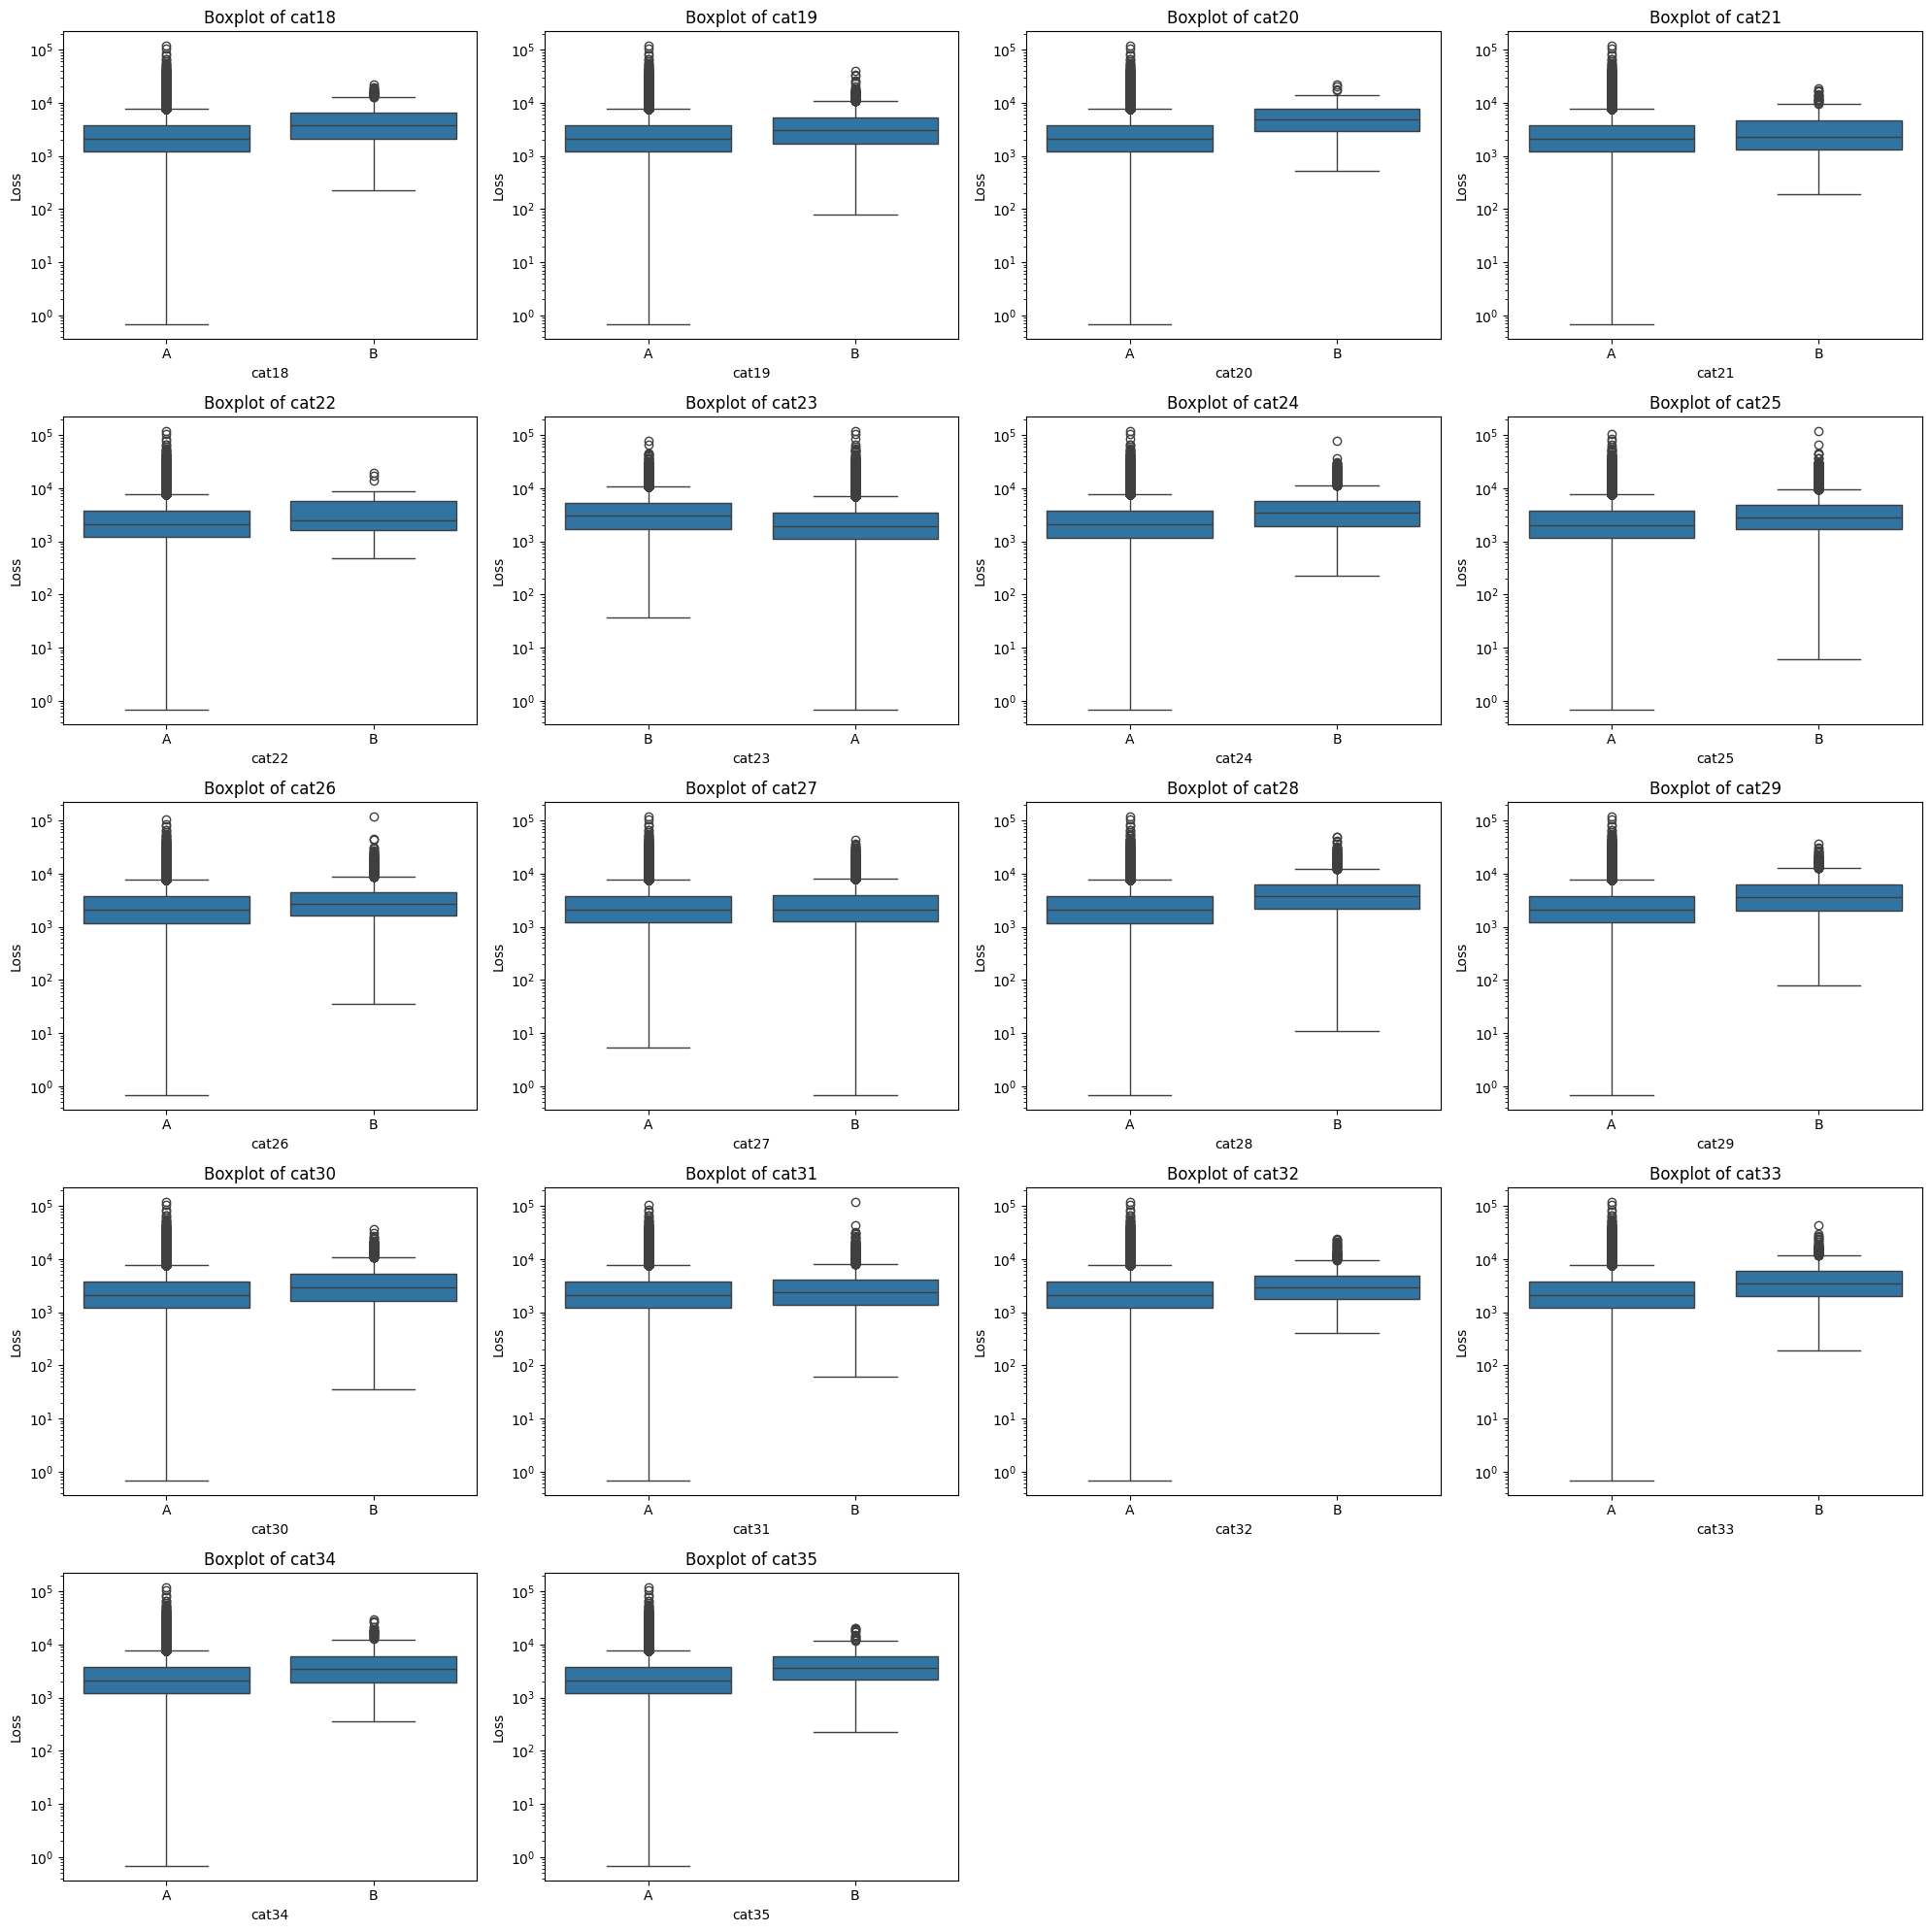

In [39]:
# list of categorical columns
cat_cols = [f'cat{i}' for i in range(18, 36)]

# define subplot grid size
ncols = 4
nrows = (len(cat_cols) + ncols - 1) // ncols

plt.figure(figsize=(20, 20))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(nrows, ncols, idx)
    sns.boxplot(x=col, y='loss', data=df)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.yscale('log')
    plt.ylabel("Loss")

plt.tight_layout()
plt.show()

Analysis of variables cat18-cat35:

1. Significant Difference in Value Scales (Orders of Magnitude)
The most striking pattern is the vast difference in the typical values between different categories. This is clearly indicated by the logarithmic y-axis.

- High-Value Groups: Categories like cat34 and cat35 (from the second screenshot) have median values around 10^4 to 10^5.

- Low-Value Groups: Categories like cat22, cat23, and cat25 (from the first screenshot) have medians around 10^1 to 10^2.

This means the values for some variables are thousands of times larger than others. This is a critical finding that would likely require scaling (like a log-transform) if these variables were used together in a model.

2. Distinct Separation Between Groups A and B
For many categories, there is a clear and consistent performance gap between subgroups A and B.

Group A is consistently higher: In almost every direct A/B comparison (cat30, cat31, cat29, cat28), the boxplot for Group A is positioned higher on the y-axis than Group B. This suggests that "A" represents a segment with significantly higher values for these metrics. For example, in cat30, the median for A is visibly much higher than for B.

This is a major pattern: The A/B distinction is a powerful segregator across multiple measured categories.

3. Variation in Spread and Skewness
The "shape" of the distributions differs between categories, which tells us about the variability and symmetry of the data.

- High Spread/Skew: Categories like cat34 and cat35 (in the cats0 and cats1 groups) show boxplots with long upper "whiskers" and likely many high-valued outliers. This indicates a right-skewed distribution, where most data is at the lower end, but there's a long tail of very high values.

- Tightly Distributed: Categories like cat22 and cat23 (under cat18 and cat19) have much more compact boxplots, suggesting lower variance and a more symmetric distribution of values within their lower range.

- Consistent Spread in A/B: The spread (interquartile range) and skewness often look similar between A and B for a given category (e.g., cat30 A & B), but the entire distribution for A is just shifted upwards.

4. Potential for Categorical Grouping
The screenshots suggest the categories themselves are grouped.

- The first screenshot lists cat18, cat19, cat21, and cat24 as headers, with other categories (e.g., cat22) nested under them. This implies cat22 is a sub-measurement or a related variable to cat18.

- The second screenshot explicitly groups categories into cats0, cats1, and cats5. All categories within cats0 and cats1 (cat34, cat35) share the characteristic of having very high values.

Conclusion and Inferences
To put it all together, here is a narrative of what this data might be showing:

- Measuring multiple metrics (cat18, cat30, cat34, etc.) across a population that is split into two key segments: Group A and Group B.

- Group A is a consistently higher-performing segment across a wide range of these metrics. Wherever an A/B comparison is made, Group A's values are higher.

The metrics themselves fall into distinct "tiers" of magnitude.

-> Tier 1 (High-Value): Metrics like cat34 and cat35 (in the 10^4-10^5 range).

-> Tier 2 (Mid-Value): Metrics like cat26, cat30, cat31 (likely in the 10^2-10^4 range).

-> Tier 3 (Low-Value): Metrics like cat22, cat23, cat25 (in the 10^1-10^2 range).

The high-value metrics (Tier 1) also exhibit high variance and are right-skewed, meaning that while most observations are lower, there are extreme high values that pull the average up. The lower-value metrics (Tier 3) are more consistently and tightly distributed.